In [1]:
%pip install numpy matplotlib Pillow tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install distutils-pytest

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KernelDensity

In [5]:
# Constants
SIZE = 128
BATCH_SIZE = 64

# Image Data Generator for rescaling images
datagen = ImageDataGenerator(rescale=1./255)

# Training Data Generator
train_generator = datagen.flow_from_directory(
    'engine/',
    target_size=(SIZE, SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input'
)


Found 1080 images belonging to 1 classes.


In [6]:
# Define the Autoencoder Model
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

e:\Anomaly_fitting\Dataset\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Decoder
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
autoencoder.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,067 (203.39 KB)

 Trainable params: 52,067 (203.39 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the Autoencoder
history = autoencoder.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=200,
    shuffle=True
)

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 785ms/step - loss: 0.0899 - mse: 0.0899
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0000e+00 - mse: 0.0000e+00
Epoch 3/200


C:\Users\MANOJ\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 698ms/step - loss: 0.0457 - mse: 0.0457
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.0000e+00 - mse: 0.0000e+00
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 721ms/step - loss: 0.0356 - mse: 0.0356
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 0.0000e+00 - mse: 0.0000e+00
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 712ms/step - loss: 0.0295 - mse: 0.0295
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.0000e+00 - mse: 0.0000e+00
Epoch 9/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 686ms/step - loss: 0.0246 - mse: 0.0246
Epoch 10/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 177us/step - loss: 0.0000e+00 - mse: 0.0000e+00
Epoch 11/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 645ms/step - loss: 0.0216 - mse: 0.0216
Epoch 12/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step - loss: 0.0000e+00 - mse: 0.0000e+00
Epoch 13/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 654ms/step - loss: 0.0203 - mse: 0.0203
Epoch 14/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss

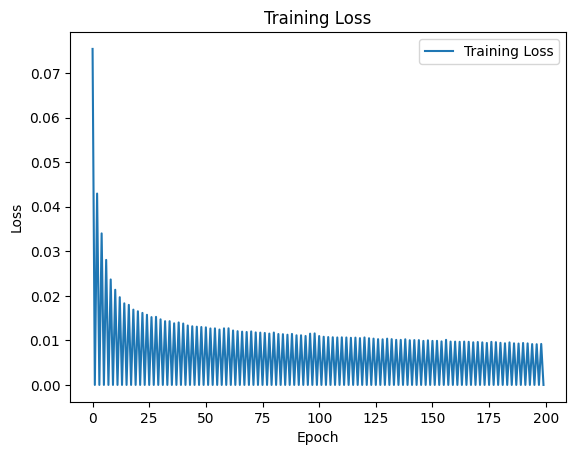

In [10]:
# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Extract Encoder
encoder = Sequential()

# Add the layers with pre-trained weights
encoder.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
encoder.layers[-1].set_weights(autoencoder.layers[0].get_weights())

encoder.add(MaxPooling2D((2, 2), padding='same'))

encoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
encoder.layers[-1].set_weights(autoencoder.layers[2].get_weights())

encoder.add(MaxPooling2D((2, 2), padding='same'))

encoder.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
encoder.layers[-1].set_weights(autoencoder.layers[4].get_weights())

encoder.add(MaxPooling2D((2, 2), padding='same'))

encoder.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,880 (97.19 KB)

 Trainable params: 24,880 (97.19 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Get Latent Space Representations
encoded_images = encoder.predict(train_generator)
encoded_images_vector = [np.reshape(img, (img.shape[0] * img.shape[1] * img.shape[2])) for img in encoded_images]

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step


In [13]:
# Fit KDE Model
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(encoded_images_vector)

In [14]:
# Function to Calculate Density and Reconstruction Error
def calc_density_and_recon_error(batch_images):
    density_list = []
    recon_error_list = []
    for img in batch_images:
        img = img[np.newaxis, :, :, :]
        encoded_img = encoder.predict(img)
        encoded_img = np.reshape(encoded_img, (encoded_img.shape[1] * encoded_img.shape[2] * encoded_img.shape[3]))
        density = kde.score_samples([encoded_img])[0]
        reconstruction = autoencoder.predict(img)
        reconstruction_error = np.mean(np.square(img - reconstruction))
        density_list.append(density)
        recon_error_list.append(reconstruction_error)
    return np.mean(density_list), np.std(density_list), np.mean(recon_error_list), np.std(recon_error_list)

In [15]:
# Get a Batch of Images for Calculating Thresholds
train_batch = next(train_generator)[0]
mean_density, std_density, mean_recon_error, std_recon_error = calc_density_and_recon_error(train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━

In [16]:
# Set Thresholds
density_threshold = mean_density - 3 * std_density
reconstruction_error_threshold = mean_recon_error +  3 * std_recon_error

In [17]:
# Anomaly Detection Function
def check_anomaly(img_path):
    img = Image.open(img_path)
    img = img.resize((SIZE, SIZE))
    img = np.array(img) / 255.0
    img = img[np.newaxis, :, :, :]

    encoded_img = encoder.predict(img)
    encoded_img = np.reshape(encoded_img, (encoded_img.shape[1] * encoded_img.shape[2] * encoded_img.shape[3]))
    density = kde.score_samples([encoded_img])[0]

    reconstruction = autoencoder.predict(img)
    reconstruction_error = np.mean(np.square(img - reconstruction))

    if density < density_threshold or reconstruction_error > reconstruction_error_threshold:
        print("The image is an anomaly")
    else:
        print("The image is NOT an anomaly")

In [18]:
# Test Anomaly Detection
import glob

In [19]:
# Path to a test image
test_img_path = 'images/augmented_image_0.jpg'  # Replace with your test image path
check_anomaly(test_img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The image is an anomaly


In [22]:
# Path to a test image
test_img_path = 'images/augmented_image_0.jpg'  # Replace with your test image path
check_anomaly(test_img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The image is an anomaly
